# ULMS Notebook
A Loan management system

In [1]:
from os import getenv

import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine, URL

DATABASE_URL = URL.create(
    "mysql+mysqldb",
    username=getenv("MYSQLDB_USR"),
    password=getenv("MYSQLDB_PWD"),
    host="localhost",
    database="ulms",
)

engine = create_engine(DATABASE_URL)

In [2]:
%matplotlib inline

In [10]:
table_name = "DISBURSEMENT"
query = f"SELECT * FROM {table_name}"

df = pd.read_sql(query, engine)
df

,ID,DATE,INTEREST_RATE,GUARANTOR,AMOUNT_DISBURSED,STATUS,CUSTOMER_FK,DISBURSED,PERIOD,RENEW_NUMBER,REMINDED,END_OF_LOAN,NUMBER_OF_INSTALLMENTS,INSTALLMENT_DUE_DATE,GUARANTOR_MOBILE,SECURITY
0,1,2015-03-06 00:00:00,15.0,ELIZABETH MSILA,1.000000e+05,Completed,1,1,30,0,0,2015-04-05 00:00:00,1,2015-04-05,None,None
1,2,2015-03-06 00:00:00,0.0,Peter Lubambi,5.000000e+05,Completed,2,1,30,0,0,2015-04-05 00:00:00,1,2015-04-05,None,None
2,3,2015-02-18 00:00:00,15.0,Esther Stephen,1.500000e+06,Completed,3,1,30,0,0,2015-03-20 00:00:00,1,2015-03-20,None,None
3,4,2015-02-18 00:00:00,15.0,Peter,2.000000e+05,Completed,4,1,30,0,0,2015-03-20 00:00:00,1,2015-03-20,None,None
4,5,2015-02-19 00:00:00,15.0,Peter,3.000000e+05,Completed,5,1,30,0,0,2015-03-21 00:00:00,1,2015-03-21,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3203,3560,2022-10-05 00:00:00,3.5,,2.015174e+06,Due,1025,1,31,4,0,2022-11-05 00:00:00,1,2022-11-05,,
3204,3561,2022-09-07 00:00:00,3.5,,6.200000e+05,Completed,887,1,31,0,0,2022-10-08 00:00:00,1,2022-10-24,,
3205,3562,2022-10-08 00:00:00,3.5,,6.200000e+05,Due,887,1,31,1,0,2022-11-08 00:00:00,1,2022-11-08,,
3206,3563,2022-10-09 00:00:00,3.5,,3.689970e+06,Due,972,1,31,6,0,2022-11-09 00:00:00,1,2022-11-09,,


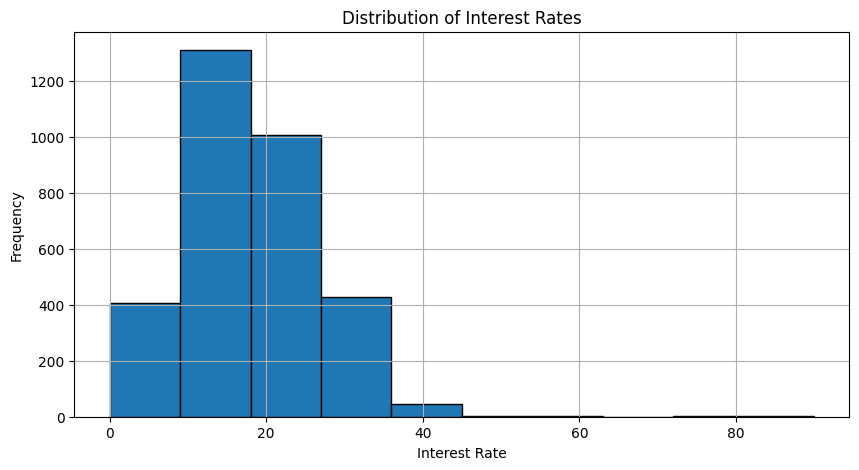

In [6]:
# Plotting the distribution of INTEREST_RATE
plt.figure(figsize=(10, 5))
plt.hist(df['INTEREST_RATE'], bins=10, edgecolor='k')
plt.title('Distribution of Interest Rates')
plt.xlabel('Interest Rate')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

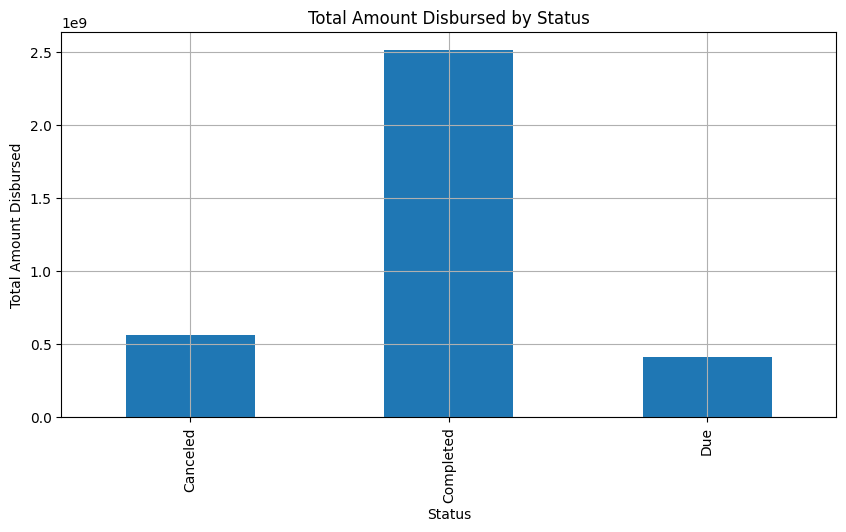

In [9]:
# Group by STATUS and sum the AMOUNT_DISBURSED
status_disbursement = df.groupby('STATUS')['AMOUNT_DISBURSED'].sum()

# Plotting
plt.figure(figsize=(10, 5))
status_disbursement.plot(kind='bar')
plt.title('Total Amount Disbursed by Status')
plt.xlabel('Status')
plt.ylabel('Total Amount Disbursed')
plt.grid(True)
plt.show()